In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
%matplotlib inline

In [2]:
# faz a leitura do ficheiro de dados localizado no github

url = 'https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv'
df = pd.read_csv(url,error_bad_lines=False)



In [3]:
# adiciona 2 colunas com o incremento diário
df['delta_confirmados'] = df['confirmados'].diff(1)
df['delta_obitos'] = df['obitos'].diff(1)



In [4]:
# adiciona 2 colunas com a média móvel
dias_MM = 7
df['delta_confirmados_MM'] = df['delta_confirmados'].rolling(dias_MM, center=True).mean()
df['delta_obitos_MM'] = df['delta_obitos'].rolling(dias_MM, center=True).mean()

# contar as colunas
# print(len(df.columns))
# iterar as colunas 
#for col in df.columns: 
#    print(col) 

In [5]:
# adiciona 2 colunas com lowess
frac=0.10
df['delta_confirmados_lowess'] = lowess(df['delta_confirmados'],df.index,frac,return_sorted=False)
df['delta_obitos_lowess'] = lowess(df['delta_obitos'],df.index,frac,return_sorted=False)


In [6]:
# escreve livro Excel
#df.to_excel("covid-19-evolucao.xlsx",
#             sheet_name='Folha1')  

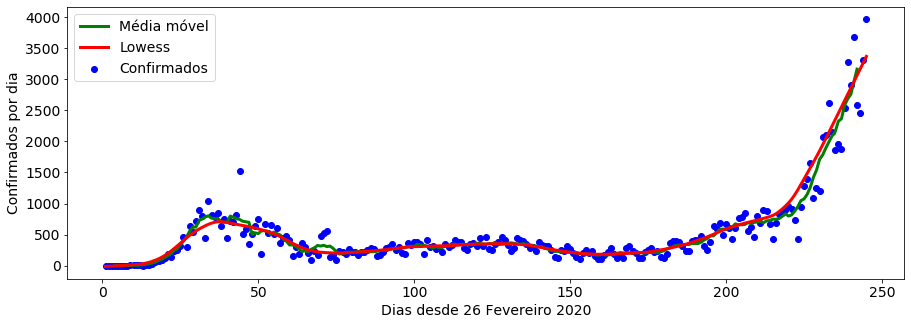

In [7]:
x = list(df.index)
y1 = list(df['delta_confirmados'])
y2 = list(df['delta_confirmados_MM'])
y3 = list(df['delta_confirmados_lowess'])

plt.rcParams['figure.figsize'] = [15, 5]
plt.rc('font', size=14)

# Real data
plt.scatter(x,y1,label="Confirmados",color="blue")
plt.plot(x,y2,label="Média móvel",color="green",linewidth=3)
plt.plot(x,y3,label="Lowess",color="red",linewidth=3)
plt.legend()
plt.xlabel("Dias desde 26 Fevereiro 2020")
plt.ylabel("Confirmados por dia")
plt.show()



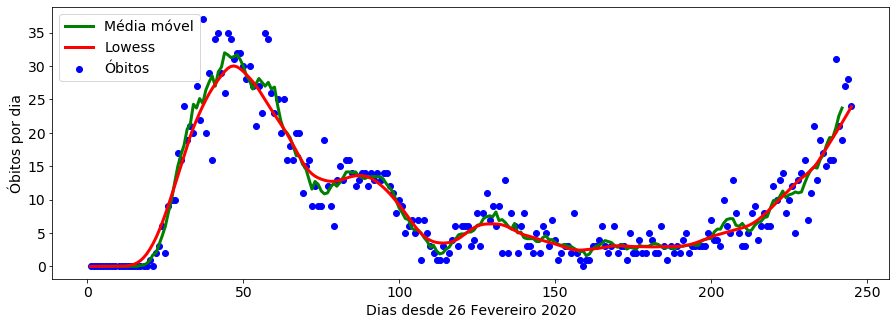

In [8]:
x = list(df.index)
y1 = list(df['delta_obitos'])
y2 = list(df['delta_obitos_MM'])
y3 = list(df['delta_obitos_lowess'])

plt.rcParams['figure.figsize'] = [15, 5]
plt.rc('font', size=14)

# Real data
plt.scatter(x,y1,label="Óbitos",color="blue")
plt.plot(x,y2,label="Média móvel",color="green",linewidth=3)
plt.plot(x,y3,label="Lowess",color="red",linewidth=3)
plt.legend()
plt.xlabel("Dias desde 26 Fevereiro 2020")
plt.ylabel("Óbitos por dia")
plt.show()